# Part 3:
## ImageNet Classification

From 20000 classes present in ImageNet dataset, we have selected below 20 classes for this project:  
1. Acropolis
2. Aircraft
3. Anchor
4. Arm chair
5. cobra
6. computer keyboard
7. Cow
8. Cultivated land
9. Delivery Truck
10. aigrette
11. Jellyfish
12. Chinese lantern
13. Motorcycling
14. pay-phone
15. pygmy chimpanzee
16. rhinoceros beetle
17. snowdrift
18. ski jumping
19. giant panda
20. palm

## Downloading Images from 20 different classes from ImageNet

In [1]:
!python /content/downloader.py  -data_root /content/drive/My\ Drive/ImageNet \
    -use_class_list True \
    -class_list n00451635 n01747885 n02403454 n09438940 n03173929 n02510455 n02738535\
    n02482650 n02709367 n03085013 n09260907 n00441073 n02174001 n03018712 n02676938 \
    n02686568 n12582231 n01910747 n03902125 n02685082\
    -images_per_class 800 \2
    -multiprocessing_workers 8

Picked the following clases: 
Count: 20
['motorcycling', 'cobra', 'cow', 'snowdrift', 'delivery truck', 'giant panda', 'armchair', 'pygmy chimpanzee', 'anchor', 'computer keyboard', 'cultivated land', 'ski jumping', 'rhinoceros beetle', 'Chinese lantern', 'acropolis', 'aircraft', 'palm', 'jellyfish', 'pay-phone', 'aigrette']
Multiprocessing workers: 8
  0% 0/20 [00:00<?, ?it/s]
Scraping stats:
STATS For class is_flickr:
 tried 242.0 urls with 215.0 successes
88.84297520661157% success rate for is_flickr urls 
0.844525862849036 seconds spent per is_flickr successful image download
STATS For class not_flickr:
 tried 0.0 urls with 0.0 successes
STATS For class all:
 tried 242.0 urls with 215.0 successes
88.84297520661157% success rate for all urls 
0.8445264949355015 seconds spent per all successful image download

Scraping stats:
STATS For class is_flickr:
 tried 492.0 urls with 431.0 successes
87.60162601626017% success rate for is_flickr urls 
0.45871240246323586 seconds spent per is_f

The above datasets for 20 classes are saved in the below link.
https://drive.google.com/drive/u/1/folders/1fZ1TwwKQMllLQkHkoag67cDPEaSA4aPr

In [2]:
# n03018712,Chinese lantern,952,787   *lantern
# n01747885,cobra,1030,691           *boa
# n09438940,snowdrift,1515,1154     *seahorse
# n02709367,anchor,1195,895      *anchor chain
# n02685082,aigrette,1492,1045   *hawk
# n02510455,giant panda,1832,1548   *tiger cub
# n02388276,trotting horse,1128,904  -----
# n02268443,dragonfly,2113,1584. -------
# n01624833,long-eared owl,1102,818   ----
# n12582231,palm,1605,1588    *wineglass


# n00451635,motorcycling,2038,976
# n01741943,boa,1214,1048.   -------
# n02403454,cow,1186,1175
# n01456756,seahorse,1272,1180    -----
# n03173929,delivery truck,1335,673
# n01323068,tiger cub,1444,1038     -----
# n02738535,armchair,1592,692
# n02482650,pygmy chimpanzee,1687,746
# n02709637,anchor chain,1055,728. -------
# n03085013,computer keyboard,2225,1397
# n09260907,cultivated land,1234,652
# n00441073,ski jumping,1070,559
# n02174001,rhinoceros beetle,1216,751
# n03640988,lantern,1356,639. --- 
# n02676938,acropolis,1262,1047
# n02686568,aircraft,1510,929
# n04592099,wineglass,1640,1490
# n01910747,jellyfish,1635,1260
# n03902125,pay-phone,1662,1473
# n01605630,hawk,1826,1680



## Storing the class names in a list

In [3]:
folder_names = ['acropolis','aircraft','anchor','armchair','cobra',\
                'computer keyboard','cow','cultivated land','delivery truck','aigrette',\
                'jellyfish','Chinese lantern','motorcycling','pay-phone','pygmy chimpanzee','rhinoceros beetle',\
                'snowdrift','ski jumping','giant panda','palm']

# folder_name = ['motorcycling', 'cobra', 'cow', 'snowdrift', 'delivery truck', 'giant panda',\
#                'armchair', 'pygmy chimpanzee', 'anchor', 'computer keyboard', 'cultivated land',\
#                'ski jumping', 'rhinoceros beetle', 'Chinese lantern', 'acropolis', 'aircraft',\
#                'palm', 'jellyfish', 'pay-phone', 'aigrette']


## Preprocessing the data

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from skimage import io,transform
import skimage
import time

x_train = []
y_train = []
x_test = []
y_test = []
# a = 0
for i in folder_names:
  start = time.time()
  print(i)
  images = glob.glob("/content/drive/My Drive/ImageNet/"+i+"/*.jpg") #[:700]
  count = 0
  
  limit = len(images)//5
  # print(limit,len(images))
  # print(len(images))
  # imlist = (io.imread_collection(images))
  for img in images: #imlist:
    img = mpimg.imread(img) #data_files[0])

    count += 1
    img = transform.resize(img,(450,300,3))
    h = transform.rescale(img[:,:,0], 0.15) #, anti_aliasing=False)
    w = transform.rescale(img[:,:,1], 0.15) #, anti_aliasing=False)
    d = transform.rescale(img[:,:,2], 0.15) #, anti_aliasing=False)
    red_img = np.asarray([h,w,d])
    red_img = np.swapaxes(red_img,0,2)
    red_img = np.swapaxes(red_img,0,1)

    if count <=limit:
      x_test.append(red_img)
      y_test.append(folder_names.index(i))
    else:
      x_train.append(red_img)
      y_train.append(folder_names.index(i))

  end = time.time()
  print("time",end-start)
  # print(len(images),i)


acropolis
time 57.240373373031616
aircraft
time 42.20575022697449
anchor
time 41.44257354736328
armchair
time 32.84951877593994
cobra
time 30.42859125137329
computer keyboard
time 47.74434232711792
cow
time 48.51810932159424
cultivated land
time 28.60112190246582
delivery truck
time 30.96891140937805
aigrette
time 40.60077238082886
jellyfish
time 47.86681795120239
Chinese lantern
time 40.07733392715454
motorcycling
time 46.86246085166931
pay-phone
time 49.136107206344604
pygmy chimpanzee
time 30.617490768432617
rhinoceros beetle
time 35.51430797576904
snowdrift
time 48.970271825790405
ski jumping
time 30.006223917007446
giant panda
time 48.656150579452515
palm
time 48.71930646896362


2704
acropolis


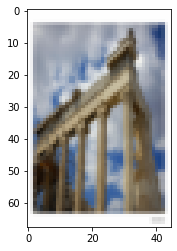

In [37]:
print(len(x_test))
print(folder_names[y_train[101]])
plt.imshow(x_train[101])
# x_train[3]


In [38]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test) 
x_train = np.asarray(x_train)
y_test = np.asarray(y_test) 

## One Hot encoding

In [41]:
import tensorflow as tf
num_classes = len(folder_names)
train_y = tf.keras.utils.to_categorical(y_train, num_classes)
test_y = tf.keras.utils.to_categorical(y_test, num_classes)
print(test_y.shape)

(2704, 20)


In [40]:
n_rows = x_train.shape[1]
n_cols = x_train.shape[2]
n_channels = x_train.shape[3]

input_shape = (n_rows, n_cols, n_channels)
input_shape

(68, 45, 3)

## Loading the libraries

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import keras
from keras import backend as K
from tensorflow.keras.datasets import mnist
from __future__ import print_function
from tensorflow.keras.optimizers import RMSprop
from time import time
import numpy as np

Using TensorFlow backend.


## Building and Applying ConvNet architecture (ConvNet1)

In [43]:
model1 = Sequential()

model1.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))

model1.add(Conv2D(64, (3,3), activation='relu'))
# model1.add(Dropout(0.2))

model1.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu'))
model1.add(Dropout(0.2))

model1.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu'))
model1.add(MaxPooling2D(pool_size=(3,3)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu'))
model1.add(Dropout(0.2))

model1.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu'))
model1.add(MaxPooling2D(pool_size=(3,3)))

model1.add(Flatten())

model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(num_classes, activation='softmax'))

In [44]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1)

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              # optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [45]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 66, 43, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 41, 64)        73792     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 39, 128)       73856     
_________________________________________________________________
dropout (Dropout)            (None, 62, 39, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 35, 128)       409728    
_________________________________________________________________
dropout_1 (Dropout)          (None, 58, 35, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 58, 35, 256)       2

In [46]:
batch_size = 128
epochs = 32


history1 = model1.fit(x_train, train_y,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, test_y),shuffle=True,callbacks=[reduce_lr])



Epoch 1/32
85/85 [==============================] - 50s 588ms/step - loss: 2.9558 - accuracy: 0.0686 - val_loss: 2.9608 - val_accuracy: 0.0854 - lr: 0.0010
Epoch 2/32
85/85 [==============================] - 45s 528ms/step - loss: 2.8327 - accuracy: 0.1257 - val_loss: 2.7780 - val_accuracy: 0.1538 - lr: 0.0010
Epoch 3/32
85/85 [==============================] - 45s 529ms/step - loss: 2.6574 - accuracy: 0.1714 - val_loss: 2.6613 - val_accuracy: 0.1757 - lr: 0.0010
Epoch 4/32
85/85 [==============================] - 45s 530ms/step - loss: 2.5130 - accuracy: 0.2170 - val_loss: 2.5284 - val_accuracy: 0.2308 - lr: 0.0010
Epoch 5/32
85/85 [==============================] - 45s 529ms/step - loss: 2.3554 - accuracy: 0.2777 - val_loss: 2.3816 - val_accuracy: 0.2711 - lr: 0.0010
Epoch 6/32
85/85 [==============================] - 45s 529ms/step - loss: 2.1958 - accuracy: 0.3222 - val_loss: 2.2645 - val_accuracy: 0.3147 - lr: 0.0010
Epoch 7/32
85/85 [==============================] - 45s 529ms/st

In [47]:
score1 = model1.evaluate(x_test, test_y, verbose=0)

print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 2.423346996307373
Test accuracy: 0.4718934893608093


## Confusion Matrix

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Accuracy Score: 0.4718934893608093')

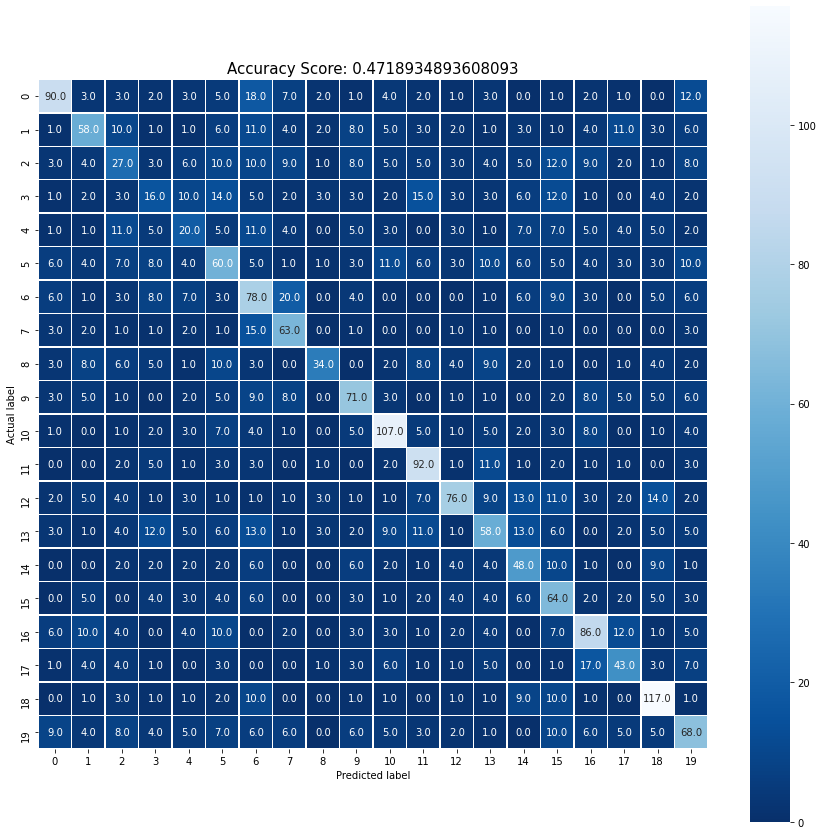

In [55]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = model1.predict_classes(x_test)

cm = confusion_matrix(np.argmax(test_y, axis=1), test_predictions)
# print(cm)

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score1[1])
plt.title(all_sample_title, size = 15)

## Training Accuracy Vs Validation Accuracy

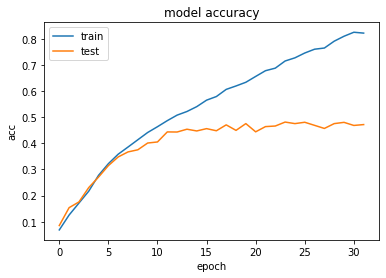

In [48]:
plt.figure()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Plotting Model loss over time

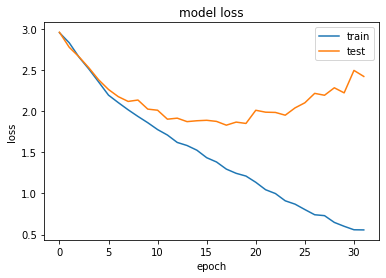

In [49]:
plt.figure()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Observation:

We can observe that there was no significant increase in test accuracy and reduction in validation loss after 13th epoch. We can see the model overfitting the training data as training accuracy continued to increase till the last epoch. From the above verbose stats, we can observe that the model loss being oscillated. We can understand that the learning rate is not reduced enough to avoid oscillations around the minima.

## Applying similar ConvNet with regularisers added and few hyper parameters changed. (ConvNet2)

In [50]:
model2 = Sequential()

model2.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))

model2.add(Conv2D(64, (3,3), activation='relu'))
# model1.add(Dropout(0.2))

model2.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu'))
model2.add(Dropout(0.2))

model2.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu',kernel_regularizer='l2'))
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu'))
model2.add(Dropout(0.2))

model2.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu',kernel_regularizer='l2'))
model2.add(MaxPooling2D(pool_size=(3,3)))

model2.add(Flatten())

model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))

In [51]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=3, min_lr=0.000001, verbose=1)

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              # optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [52]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 66, 43, 128)       3584      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 41, 64)        73792     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 62, 39, 128)       73856     
_________________________________________________________________
dropout_6 (Dropout)          (None, 62, 39, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 58, 35, 128)       409728    
_________________________________________________________________
dropout_7 (Dropout)          (None, 58, 35, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 58, 35, 256)      

In [54]:
batch_size = 128
epochs = 48


history2 = model2.fit(x_train, train_y,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, test_y),shuffle=True,callbacks=[reduce_lr])



Epoch 1/48
85/85 [==============================] - 45s 535ms/step - loss: 3.2676 - accuracy: 0.0884 - val_loss: 2.9135 - val_accuracy: 0.0976 - lr: 0.0010
Epoch 2/48
85/85 [==============================] - 45s 532ms/step - loss: 2.8138 - accuracy: 0.1305 - val_loss: 2.7668 - val_accuracy: 0.1398 - lr: 0.0010
Epoch 3/48
85/85 [==============================] - 45s 532ms/step - loss: 2.6602 - accuracy: 0.1711 - val_loss: 2.6508 - val_accuracy: 0.1853 - lr: 0.0010
Epoch 4/48
85/85 [==============================] - 45s 530ms/step - loss: 2.5707 - accuracy: 0.2056 - val_loss: 2.5951 - val_accuracy: 0.2171 - lr: 0.0010
Epoch 5/48
85/85 [==============================] - 45s 530ms/step - loss: 2.4681 - accuracy: 0.2412 - val_loss: 2.5477 - val_accuracy: 0.2271 - lr: 0.0010
Epoch 6/48
85/85 [==============================] - 45s 531ms/step - loss: 2.3730 - accuracy: 0.2688 - val_loss: 2.4291 - val_accuracy: 0.2507 - lr: 0.0010
Epoch 7/48
85/85 [==============================] - 45s 530ms/st

In [56]:
score2 = model2.evaluate(x_test, test_y, verbose=0)

print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 1.9704837799072266
Test accuracy: 0.48853549361228943


## Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.48853549361228943')

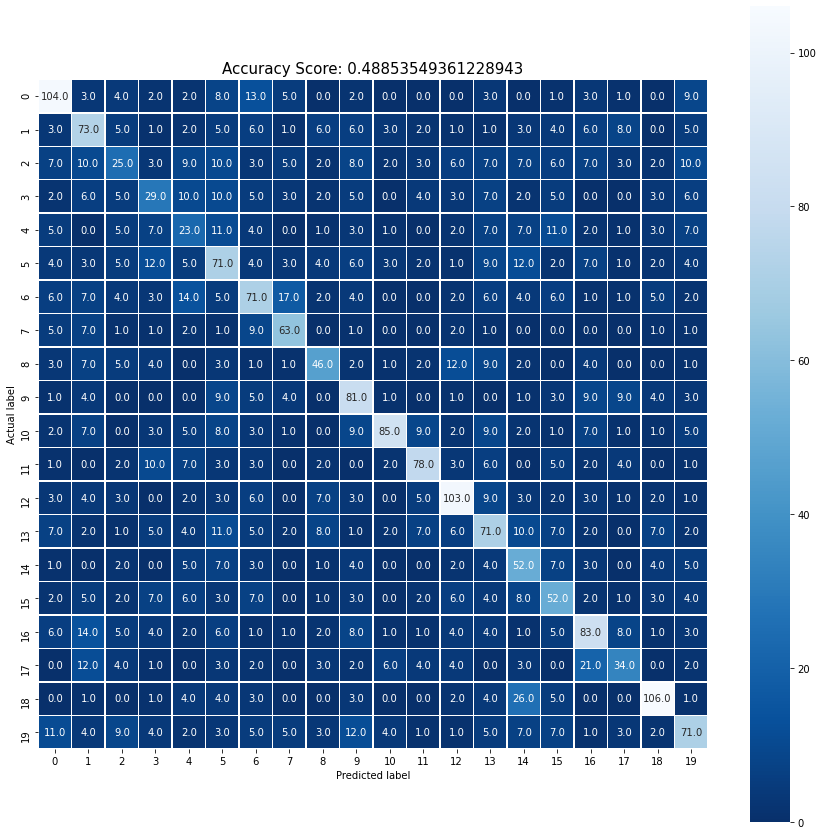

In [57]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = model2.predict_classes(x_test)

cm = confusion_matrix(np.argmax(test_y, axis=1), test_predictions)
# print(cm)

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score2[1])
plt.title(all_sample_title, size = 15)

## Training Accuracy Vs Validation Accuracy

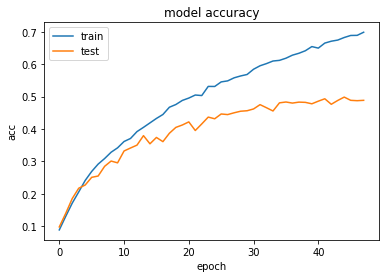

In [58]:
plt.figure()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Plotting Model loss over time

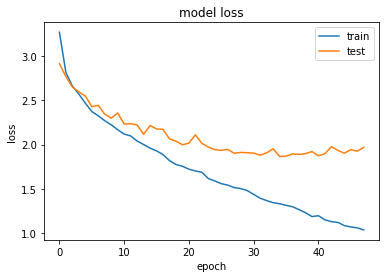

In [59]:
plt.figure()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Observation

By reducing patience to 2 and factor to 0.75 of ReduceLROnPlateau and adding regularizers to few layers, we can see that overfitting had been reduced and model seemed to be stabilized at the end of epochs achieving an accuracy of 48.85 % on test dataset.  
We can either run for more epochs and look for better results (as the validation loss had not started to hike yet) or we can try to reduce the learning rate factor and patience more and look for better validation accuracy.

## Applying ConvNet model with an additional regulariser and reduced learning rate factor than previous model. (ConvNet3)


In [60]:
model3 = Sequential()

model3.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))

model3.add(Conv2D(64, (3,3), activation='relu'))
# model1.add(Dropout(0.2))

model3.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu',kernel_regularizer='l2'))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu'))
model3.add(Dropout(0.2))

model3.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu',kernel_regularizer='l2'))
model3.add(MaxPooling2D(pool_size=(3,3)))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu'))
model3.add(Dropout(0.2))

model3.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu',kernel_regularizer='l2'))
model3.add(MaxPooling2D(pool_size=(3,3)))

model3.add(Flatten())

model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(num_classes, activation='softmax'))

In [61]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.65, patience=3, min_lr=0.000001, verbose=1)

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              # optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [62]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 66, 43, 128)       3584      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 41, 64)        73792     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 62, 39, 128)       73856     
_________________________________________________________________
dropout_12 (Dropout)         (None, 62, 39, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 58, 35, 128)       409728    
_________________________________________________________________
dropout_13 (Dropout)         (None, 58, 35, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 58, 35, 256)      

In [63]:
batch_size = 128
epochs = 64


history3 = model3.fit(x_train, train_y,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, test_y),shuffle=True,callbacks=[reduce_lr])



Epoch 1/64
85/85 [==============================] - 46s 536ms/step - loss: 3.7031 - accuracy: 0.0865 - val_loss: 2.8311 - val_accuracy: 0.1209 - lr: 0.0010
Epoch 2/64
85/85 [==============================] - 45s 531ms/step - loss: 2.7499 - accuracy: 0.1400 - val_loss: 2.6981 - val_accuracy: 0.1668 - lr: 0.0010
Epoch 3/64
85/85 [==============================] - 45s 532ms/step - loss: 2.6219 - accuracy: 0.1892 - val_loss: 2.6384 - val_accuracy: 0.1979 - lr: 0.0010
Epoch 4/64
85/85 [==============================] - 45s 531ms/step - loss: 2.5130 - accuracy: 0.2414 - val_loss: 2.5126 - val_accuracy: 0.2396 - lr: 0.0010
Epoch 5/64
85/85 [==============================] - 45s 530ms/step - loss: 2.4132 - accuracy: 0.2726 - val_loss: 2.4462 - val_accuracy: 0.2607 - lr: 0.0010
Epoch 6/64
85/85 [==============================] - 45s 531ms/step - loss: 2.3545 - accuracy: 0.2941 - val_loss: 2.4346 - val_accuracy: 0.2681 - lr: 0.0010
Epoch 7/64
85/85 [==============================] - 45s 530ms/st

In [64]:
score3 = model3.evaluate(x_test, test_y, verbose=0)

print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 2.043241024017334
Test accuracy: 0.4208579957485199


## Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.48853549361228943')

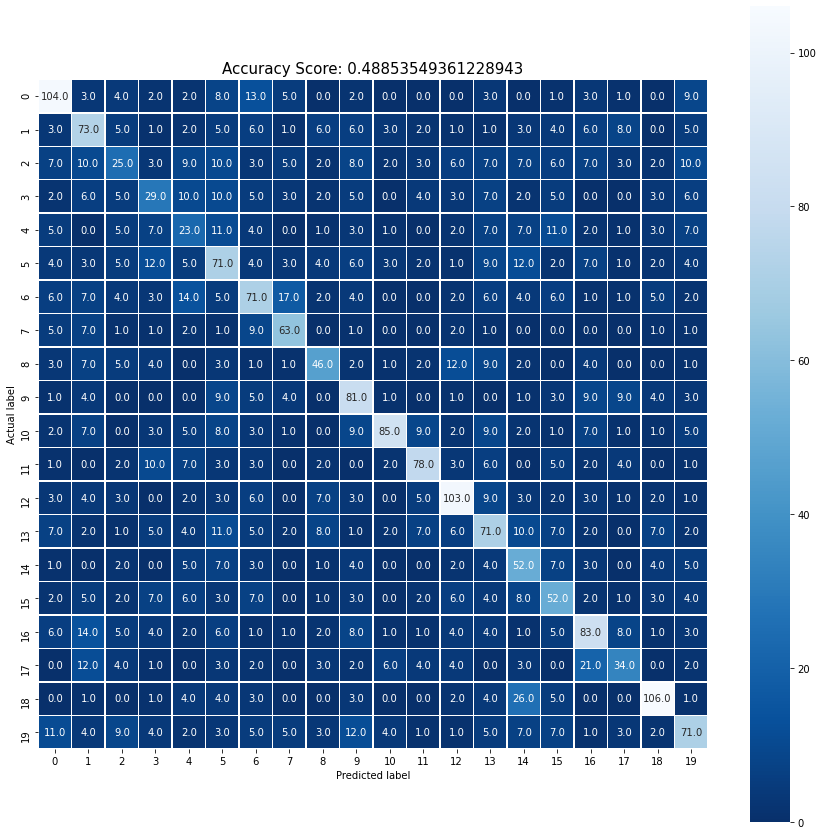

In [65]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = model3.predict_classes(x_test)

cm = confusion_matrix(np.argmax(test_y, axis=1), test_predictions)
# print(cm)

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score2[1])
plt.title(all_sample_title, size = 15)

## Training Accuracy Vs Validation Accuracy

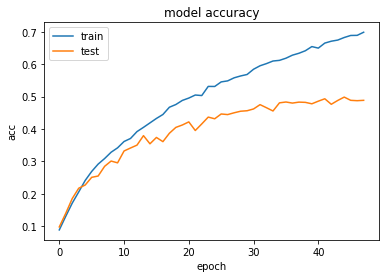

In [66]:
plt.figure()
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Plotting Model loss over time

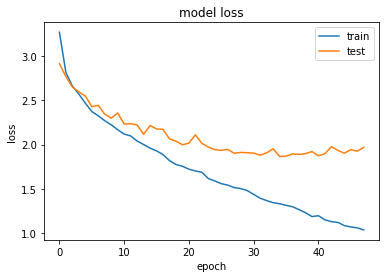

In [67]:
plt.figure()
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Observation:

We can observe that there was not much increase in the test accuracy (48.85 %) by reducing learning rate and adding more regularization to the layers.   
May be, we have to try a greater number of epochs on ConvNet model 2 as we were not sure about the testing accuracy stabilization.

## Checking ConvNet2 model for more number of epochs to check the case of overfitting.

In [68]:
batch_size = 128
epochs = 20


history4 = model2.fit(x_train, train_y,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, test_y),shuffle=True,callbacks=[reduce_lr])



Epoch 1/20
85/85 [==============================] - 45s 534ms/step - loss: 1.0192 - accuracy: 0.7038 - val_loss: 1.9867 - val_accuracy: 0.4945 - lr: 1.3348e-04
Epoch 2/20
85/85 [==============================] - 45s 533ms/step - loss: 1.0138 - accuracy: 0.7009 - val_loss: 1.9400 - val_accuracy: 0.4937 - lr: 1.3348e-04
Epoch 3/20
85/85 [==============================] - 45s 532ms/step - loss: 1.0156 - accuracy: 0.7040 - val_loss: 1.9597 - val_accuracy: 0.4867 - lr: 1.3348e-04
Epoch 4/20
85/85 [==============================] - 45s 531ms/step - loss: 1.0069 - accuracy: 0.7109 - val_loss: 1.9746 - val_accuracy: 0.4815 - lr: 1.3348e-04
Epoch 5/20
85/85 [==============================] - ETA: 0s - loss: 0.9842 - accuracy: 0.7110
Epoch 00005: ReduceLROnPlateau reducing learning rate to 8.676451834617182e-05.
85/85 [==============================] - 45s 533ms/step - loss: 0.9842 - accuracy: 0.7110 - val_loss: 1.9782 - val_accuracy: 0.4863 - lr: 1.3348e-04
Epoch 6/20
85/85 [===================

In [131]:
score4 = model2.evaluate(x_test, test_y, verbose=0)

print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 2.012007474899292
Test accuracy: 0.48557692766189575


## Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.48557692766189575')

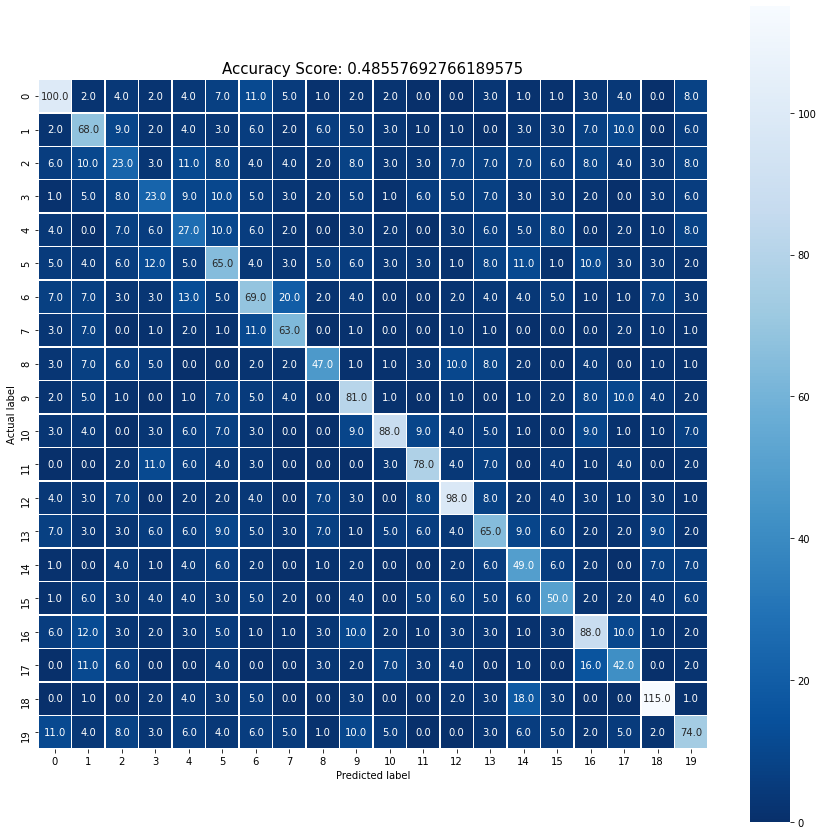

In [132]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = model2.predict_classes(x_test)

cm = confusion_matrix(np.argmax(test_y, axis=1), test_predictions)
# print(cm)

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score4[1])
plt.title(all_sample_title, size = 15)

## Train Vs Test Accuracy

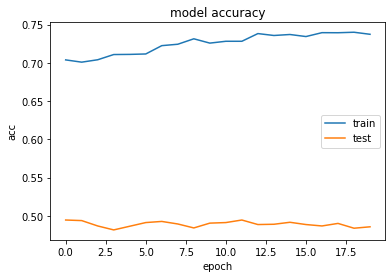

In [133]:
plt.figure()
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Model loss over Time (Train Vs Test)

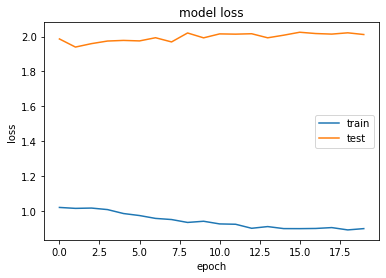

In [134]:
plt.figure()
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Observation:

We can see that the test accuracy did not increase much, it was still around 48.5% but training accuracy went up to 89.5%.  
Model is overfitting the training data when number of epochs are increased.   

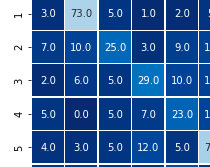  

Looking at the Confusion Matrix, we can observe that mostly labels 2,3,4 (which are 'anchor', 'armchair', 'cobra') are wrongly classified till now for all the 3 ConvNet models. 
So, in order to achieve better testing accuracy, we need to increase the size of training data. But instead of blindly implementing data augmentation on the entire training data. We may get better results if we add more generated training data for those which are wrongly classified in most of the classes.


## Extracting starting indices of the labels 2,3 and 4. As the training and testing images and labels are in a sequence, this helps us with extraction of the images.

In [95]:
start_a = y_train.index(2)
start_b = y_train.index(3)
start_c = y_train.index(4)

print(start_a,start_b,start_c)


1206 1750 2179


## Getting a list of indices of a particular label

In [96]:
indices_a = list(range(start_a,start_b-1))
indices_b = list(range(start_b,start_c-1))
indices_c = list(range(start_c,start_c+300))

## Extracting training images (100 each) for those particular classes

In [97]:
picked_a = np.random.choice(indices_a,100, replace=False)
picked_b = np.random.choice(indices_b,100, replace=False)
picked_c = np.random.choice(indices_c,100, replace=False)

sample_train_a = list(map(x_train.__getitem__, picked_a))
sample_train_b = list(map(x_train.__getitem__, picked_b))
sample_train_c = list(map(x_train.__getitem__, picked_c))

sample_train = sample_train_a + sample_train_b + sample_train_c

len(sample_train)


300

## Generating labels for the above extracted images

In [100]:
sample_labels = [2]*100 + [3]*100 + [4]*100
len(sample_labels)

300

In [103]:
sample_train = np.asarray(sample_train)
sample_labels = np.asarray(sample_labels)

## Using Image Data Generator for rotation, random cropping(zoom), horizontal flip and vertical flip. This is data augumentation function is then fitted to the recently formed training data

In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=45,width_shift_range = 3,height_shift_range = 3, zoom_range = 0.1,
                             fill_mode = 'reflect',horizontal_flip=True,vertical_flip=True)
datagen.fit(sample_train)


## Each of the above training image is passing to the function with batch size 1 to get the generated images which can be included into training data

In [105]:
x_batch = []
y_batch = []
for a,b in datagen.flow(sample_train,sample_labels,batch_size =1):
    x_batch.append(np.array(np.expand_dims(a.squeeze(),-1),dtype = 'float64'))
    y_batch.append(b)
    if len(x_batch)>=500:
      # print("its here")
      break

## One hot encoding

In [113]:
import tensorflow as tf
num_classes = len(folder_names)

y_batch = tf.keras.utils.to_categorical(y_batch, num_classes)
print(y_batch.shape)

(500, 20)


## Reshaping generated images size

In [119]:
x_batch = np.asarray(x_batch)
shape = (x_batch.shape[0],x_batch.shape[1],x_batch.shape[2],x_batch.shape[3])
x_batch = np.reshape(x_batch,shape)

print(x_batch.shape)

(500, 68, 45, 3)


## Storing the images and labels into a final list

In [121]:
final_x_train = []
final_x_train.extend(x_train)
final_x_train.extend(x_batch)

final_x_train = np.asarray(final_x_train)
print(final_x_train.shape)

final_y_train = []
final_y_train.extend(train_y)
final_y_train.extend(y_batch)
final_y_train = np.asarray(final_y_train)
final_y_train.shape

(11339, 68, 45, 3)


(11339, 20)

## Applying the same ConvNet model (2) to the latest training data with augumented data included in it.

In [122]:
model_aug = Sequential()

model_aug.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))

model_aug.add(Conv2D(64, (3,3), activation='relu'))
# model1.add(Dropout(0.2))

model_aug.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model_aug.add(Dropout(0.2))

model_aug.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu'))
model_aug.add(Dropout(0.2))

model_aug.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu',kernel_regularizer='l2'))
model_aug.add(MaxPooling2D(pool_size=(3,3)))
model_aug.add(Dropout(0.2))

model_aug.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model_aug.add(Dropout(0.2))

model_aug.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu'))
model_aug.add(Dropout(0.2))

model_aug.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu',kernel_regularizer='l2'))
model_aug.add(MaxPooling2D(pool_size=(3,3)))

model_aug.add(Flatten())

model_aug.add(Dense(256, activation='relu'))
model_aug.add(Dense(128, activation='relu'))
model_aug.add(Dropout(0.2))
model_aug.add(Dense(num_classes, activation='softmax'))

In [123]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=3, min_lr=0.000001, verbose=1)

model_aug.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              # optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [124]:
model_aug.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 66, 43, 128)       3584      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 64, 41, 64)        73792     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 62, 39, 128)       73856     
_________________________________________________________________
dropout_18 (Dropout)         (None, 62, 39, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 58, 35, 128)       409728    
_________________________________________________________________
dropout_19 (Dropout)         (None, 58, 35, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 58, 35, 256)      

In [125]:
batch_size = 128
epochs = 48


history_aug = model_aug.fit(final_x_train, final_y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, test_y),shuffle=True,callbacks=[reduce_lr])



Epoch 1/48
89/89 [==============================] - 51s 576ms/step - loss: 3.3933 - accuracy: 0.0881 - val_loss: 2.8609 - val_accuracy: 0.1483 - lr: 0.0010
Epoch 2/48
89/89 [==============================] - 47s 531ms/step - loss: 2.6831 - accuracy: 0.1690 - val_loss: 2.5971 - val_accuracy: 0.2086 - lr: 0.0010
Epoch 3/48
89/89 [==============================] - 47s 531ms/step - loss: 2.5346 - accuracy: 0.2273 - val_loss: 2.4939 - val_accuracy: 0.2445 - lr: 0.0010
Epoch 4/48
89/89 [==============================] - 47s 531ms/step - loss: 2.4054 - accuracy: 0.2725 - val_loss: 2.5561 - val_accuracy: 0.2304 - lr: 0.0010
Epoch 5/48
89/89 [==============================] - 47s 529ms/step - loss: 2.3294 - accuracy: 0.2980 - val_loss: 2.3513 - val_accuracy: 0.3003 - lr: 0.0010
Epoch 6/48
89/89 [==============================] - 47s 529ms/step - loss: 2.2521 - accuracy: 0.3210 - val_loss: 2.2712 - val_accuracy: 0.3225 - lr: 0.0010
Epoch 7/48
89/89 [==============================] - 47s 532ms/st

In [127]:
score_aug = model_aug.evaluate(x_test, test_y, verbose=0)

print('Test loss:', score_aug[0])
print('Test accuracy:', score_aug[1])

Test loss: 2.1945579051971436
Test accuracy: 0.517011821269989


Text(0.5, 1.0, 'Accuracy Score: 0.517011821269989')

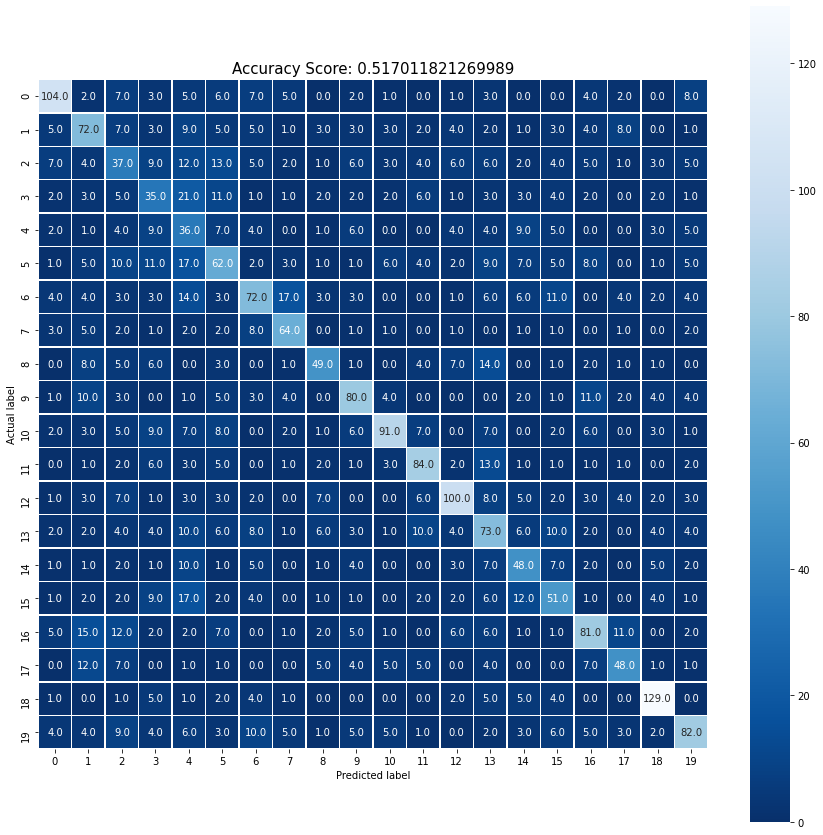

In [128]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = model_aug.predict_classes(x_test)

cm = confusion_matrix(np.argmax(test_y, axis=1), test_predictions)
# print(cm)

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_aug[1])
plt.title(all_sample_title, size = 15)

## Train Vs Test Accuracy

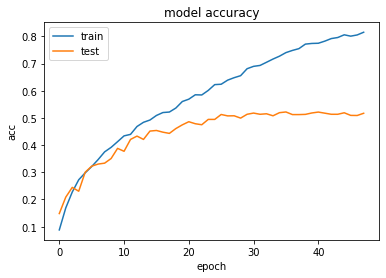

In [129]:
plt.figure()
plt.plot(history_aug.history['accuracy'])
plt.plot(history_aug.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Model loss over time

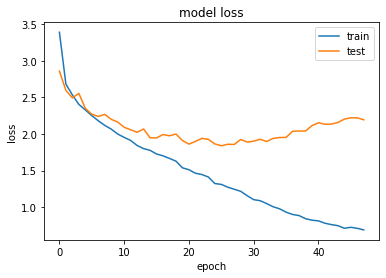

In [130]:
plt.figure()
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Observation:

We can observe an increase in test accuracy. Augmenting a particular section of data which was misclassified had yielded a better generalization of the model. Test/Validation accuracy: 51.7%


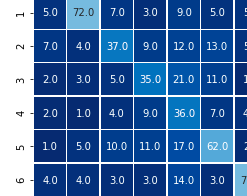

We can see that labels 2,3 and 4 are less misclassified this time. So, a little more addition of augmented data can be beneficial.

----------

## Comparing the Performance of each model

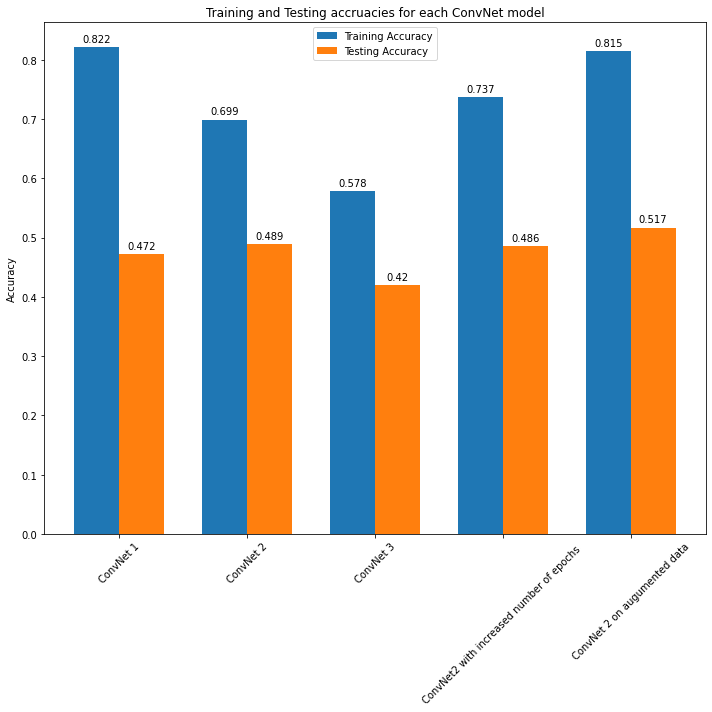

In [136]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

test1 = round(score1[1],3)
test2 = round(score2[1],3)
test3 = 0.42 # round(score3[1],3)
test4 = round(score4[1],3)
test5 = round(score_aug[1],3)

train1 = round(history1.history['accuracy'][-1],3)
train2 = round(history2.history['accuracy'][-1],3)
train3 = 0.578 # round(history3.history['accuracy'][-1],3)
train4 = round(history3.history['accuracy'][-1],3)
train5 = round(history_aug.history['accuracy'][-1],3)

labels = ['ConvNet 1', 'ConvNet 2', 'ConvNet 3', 'ConvNet2 with increased number of epochs ', 'ConvNet 2 on augumented data']
# training_accuracy = [round(history1.history['accuracy'][-1],3), round(history2.history['accuracy'][-1],3), round(history3.history['accuracy'][-1],3), round(history5.history['accuracy'][-1],3)]
training_accuracy = [train1,train2,train3,train4,train5]
# testing_accuracy = [round(score1[1],3), round(score2[1],3), round(score3[1],3), round(score5[1],3)]
testing_accuracy = [test1,test2,test3,test4,test5]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# plt.figure(figsize=[20,20])
fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(x - width/2, training_accuracy, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, testing_accuracy, width, label='Testing Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Training and Testing accruacies for each ConvNet model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Observation:

From the comparison, we can observe that model can be restricted to not overfit further but that doesn't always necessarily increase test accuracy of the ConvNet.  
Model may not increase the validation/test accuracy because may be train and test dataset are from different distributions or the model need more training data to perform better on testing data.

-------------------

## Trying to improve test accuracy further with the help of data augumentation.

## Extracting starting indices of the labels 2,3 and 4. As the training and testing images and labels are in a sequence, it is easy to extract the images.

In [137]:
start_a = y_train.index(2)
start_b = y_train.index(3)
start_c = y_train.index(4)

print(start_a,start_b,start_c)


1206 1750 2179


## Getting a list of indices of a particular label

In [151]:
indices_a = list(range(start_a,start_b-1))
indices_b = list(range(start_b,start_c-1))
indices_c = list(range(start_c,start_c+300))

## Extracting training images (100 each) for those particular classes

In [152]:
picked_a = np.random.choice(indices_a,100, replace=False)
picked_b = np.random.choice(indices_b,100, replace=False)
picked_c = np.random.choice(indices_c,100, replace=False)

sample_train_a = list(map(x_train.__getitem__, picked_a))
sample_train_b = list(map(x_train.__getitem__, picked_b))
sample_train_c = list(map(x_train.__getitem__, picked_c))

sample_train = sample_train_a + sample_train_b + sample_train_c

len(sample_train)


300

## Generating labels for the above extracted images

In [153]:
sample_labels = [2]*100 + [3]*100 + [4]*100
len(sample_labels)

300

In [155]:
sample_train = np.asarray(sample_train)
sample_labels = np.asarray(sample_labels)

## Using Image Data Generator for rotation, random cropping(zoom), horizontal flip and vertical flip. This is data augumentation function is then fitted to the recently formed training data

In [156]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_2 = ImageDataGenerator(rotation_range=60,width_shift_range = 3,height_shift_range = 3, zoom_range = 0.1,
                             fill_mode = 'reflect',horizontal_flip=True,vertical_flip=True)
datagen_2.fit(sample_train)


## Each of the above training image is passing to the fucntion with batch size 1 to get the generated images which can be included into training data

In [157]:
x_batch_2 = []
y_batch_2 = []
for a,b in datagen_2.flow(sample_train,sample_labels,batch_size =1):
    x_batch_2.append(np.array(np.expand_dims(a.squeeze(),-1),dtype = 'float64'))
    y_batch_2.append(b)
    if len(x_batch_2)>=650:
      # print("its here")
      break

## One hot encoding

In [158]:
import tensorflow as tf
num_classes = len(folder_names)

y_batch_2 = tf.keras.utils.to_categorical(y_batch_2, num_classes)
print(y_batch_2.shape)

(650, 20)


## Reshaping generated images size

In [159]:
x_batch_2 = np.asarray(x_batch_2)
shape = (x_batch_2.shape[0],x_batch_2.shape[1],x_batch_2.shape[2],x_batch_2.shape[3])
x_batch_2 = np.reshape(x_batch_2,shape)

print(x_batch_2.shape)

(650, 68, 45, 3)


## Storing the images and labels into a final list

In [160]:
final_x_train_2 = []
final_x_train_2.extend(final_x_train)
final_x_train_2.extend(x_batch_2)

final_x_train_2 = np.asarray(final_x_train_2)
print(final_x_train_2.shape)

final_y_train_2 = []
final_y_train_2.extend(final_y_train)
final_y_train_2.extend(y_batch_2)
final_y_train_2 = np.asarray(final_y_train_2)
final_y_train_2.shape

(11989, 68, 45, 3)


(11989, 20)

## Applying the same ConvNet model (2) to the latest training data with augumented data included in it.

In [161]:
model_final = Sequential()

model_final.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))

model_final.add(Conv2D(64, (3,3), activation='relu'))
# model1.add(Dropout(0.2))

model_final.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model_final.add(Dropout(0.2))

model_final.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu'))
model_final.add(Dropout(0.2))

model_final.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu',kernel_regularizer='l2'))
model_final.add(MaxPooling2D(pool_size=(3,3)))
model_final.add(Dropout(0.2))

model_final.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model_final.add(Dropout(0.2))

model_final.add(Conv2D(128, kernel_size=(5,5),padding="valid", activation='relu'))
model_final.add(Dropout(0.2))

model_final.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu',kernel_regularizer='l2'))
model_final.add(MaxPooling2D(pool_size=(3,3)))

model_final.add(Flatten())

model_final.add(Dense(256, activation='relu'))
model_final.add(Dense(128, activation='relu'))
model_final.add(Dropout(0.2))
model_final.add(Dense(num_classes, activation='softmax'))

In [162]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=3, min_lr=0.000001, verbose=1)

model_final.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              # optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [163]:
model_final.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 66, 43, 128)       3584      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 64, 41, 64)        73792     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 62, 39, 128)       73856     
_________________________________________________________________
dropout_30 (Dropout)         (None, 62, 39, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 58, 35, 128)       409728    
_________________________________________________________________
dropout_31 (Dropout)         (None, 58, 35, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 58, 35, 256)      

In [164]:
batch_size = 128
epochs = 48


history_final = model_final.fit(final_x_train_2, final_y_train_2,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, test_y),shuffle=True,callbacks=[reduce_lr])



Epoch 1/48
94/94 [==============================] - 50s 534ms/step - loss: 3.4162 - accuracy: 0.0897 - val_loss: 2.8367 - val_accuracy: 0.0984 - lr: 0.0010
Epoch 2/48
94/94 [==============================] - 50s 529ms/step - loss: 2.6900 - accuracy: 0.1547 - val_loss: 2.6668 - val_accuracy: 0.1890 - lr: 0.0010
Epoch 3/48
94/94 [==============================] - 50s 530ms/step - loss: 2.5583 - accuracy: 0.2028 - val_loss: 2.5948 - val_accuracy: 0.2030 - lr: 0.0010
Epoch 4/48
94/94 [==============================] - 50s 530ms/step - loss: 2.4664 - accuracy: 0.2400 - val_loss: 2.5114 - val_accuracy: 0.2474 - lr: 0.0010
Epoch 5/48
94/94 [==============================] - 50s 528ms/step - loss: 2.4022 - accuracy: 0.2718 - val_loss: 2.4470 - val_accuracy: 0.2737 - lr: 0.0010
Epoch 6/48
94/94 [==============================] - 50s 530ms/step - loss: 2.3183 - accuracy: 0.2934 - val_loss: 2.3885 - val_accuracy: 0.2888 - lr: 0.0010
Epoch 7/48
94/94 [==============================] - 50s 528ms/st

In [165]:
score_final = model_final.evaluate(x_test, test_y, verbose=0)

print('Test loss:', score_final[0])
print('Test accuracy:', score_final[1])

Test loss: 2.0788400173187256
Test accuracy: 0.5107248425483704


Text(0.5, 1.0, 'Accuracy Score: 0.5107248425483704')

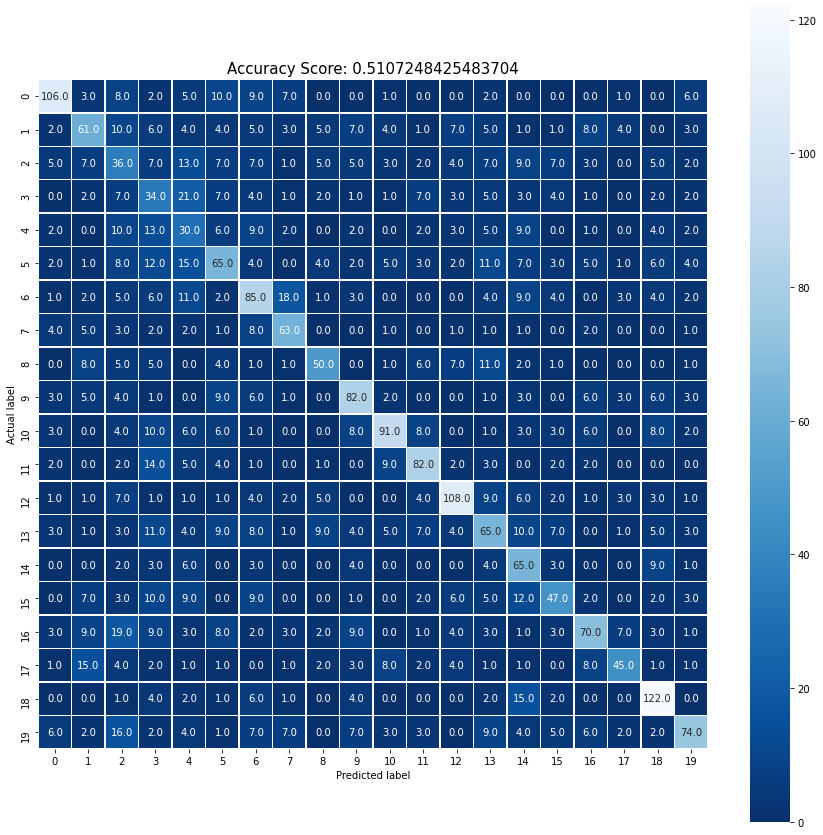

In [167]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = model_final.predict_classes(x_test)

cm = confusion_matrix(np.argmax(test_y, axis=1), test_predictions)
# print(cm)

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_final[1])
plt.title(all_sample_title, size = 15)

## Train Vs Test Accuracy

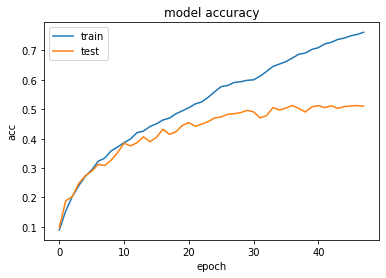

In [169]:
plt.figure()
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Model loss over time

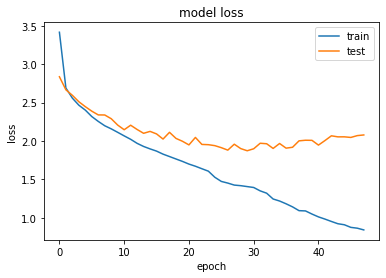

In [170]:
plt.figure()
plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Observation:

Model performance on Validation/test data was very much similar to previous case. May be picking more labels which are correlated to the most misclassified labels for data augmentation would help us increase test accuracy.